In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
def experimentalpha(epsilon, alpha, arms, timesteps,runs):
  ExpectedReward=[0]*timesteps
  OptimalArmChosen=[0]*timesteps
  for j in range(runs):
    # print(j)
    ActualQ=[np.random.normal(0,1)]*arms
    # OptimalArm=np.argmax(ActualQ)
    EstimatedQ=[0]*arms
    NoOfTimesChosen=[0]*arms
    for i in range(timesteps):
      OptimalArm=np.argmax(ActualQ)
      x=random.random()
      if x>1-epsilon:
        chosenArm=int((random.random()*10))
      else:
        chosenArm=np.argmax(EstimatedQ)
      if chosenArm==OptimalArm:
        OptimalArmChosen[i]+=1
      currentReward=np.random.normal(ActualQ[chosenArm],1)
      NoOfTimesChosen[chosenArm]+=1
      EstimatedQ[chosenArm]+=alpha*(currentReward-EstimatedQ[chosenArm])
      ExpectedReward[i]+=currentReward
      for k in range(arms):
        ActualQ[k]+=np.random.normal(0,0.01)
  for i in range(timesteps):
    ExpectedReward[i]/=runs
    OptimalArmChosen[i]*=(100/runs)
  return ExpectedReward,OptimalArmChosen



In [ ]:
def experiment_sampleAvg(epsilon, arms, timesteps,runs):
  ExpectedReward=[0]*timesteps
  OptimalArmChosen=[0]*timesteps
  for j in range(runs):
    ActualQ=[np.random.normal(0,1)]*arms
    # OptimalArm=np.argmax(ActualQ)
    EstimatedQ=[0]*arms
    NoOfTimesChosen=[0]*arms
    for i in range(timesteps):
      OptimalArm=np.argmax(ActualQ)
      x=random.random()
      if x>1-epsilon:
        chosenArm=int((random.random()*10))
      else:
        chosenArm=np.argmax(EstimatedQ)
      if OptimalArm==chosenArm:
        OptimalArmChosen[i]+=1
      currentReward=np.random.normal(ActualQ[chosenArm],1)
      NoOfTimesChosen[chosenArm]+=1
      EstimatedQ[chosenArm]=EstimatedQ[chosenArm]+(currentReward-EstimatedQ[chosenArm])/NoOfTimesChosen[chosenArm]
      ExpectedReward[i]+=currentReward
      for k in range(arms):
        ActualQ[k]+=np.random.normal(0,0.01)
  for i in range(timesteps):
    ExpectedReward[i]/=runs
    OptimalArmChosen[i]*=(100/runs)
  return ExpectedReward,OptimalArmChosen



In [ ]:
ExpR_alpha,OptArm_alpha=experimentalpha(0.1,0.1,10,10000,2000)

In [ ]:
ExpR_avg,OptArm_avg=experiment_sampleAvg(0.1,10,10000,2000)

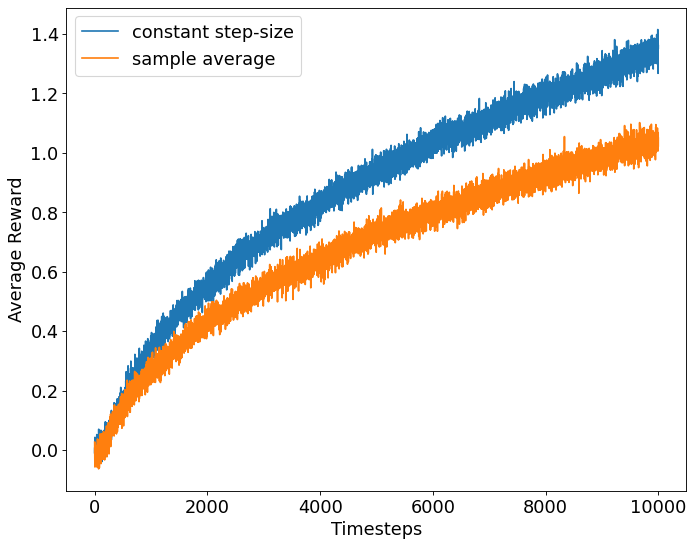

In [ ]:
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 16})
plt.plot(ExpR_alpha)
plt.xlabel("Timesteps")
plt.ylabel("Average Reward")
plt.plot(ExpR_avg)
plt.legend(["constant step-size","sample average"])
plt.show()

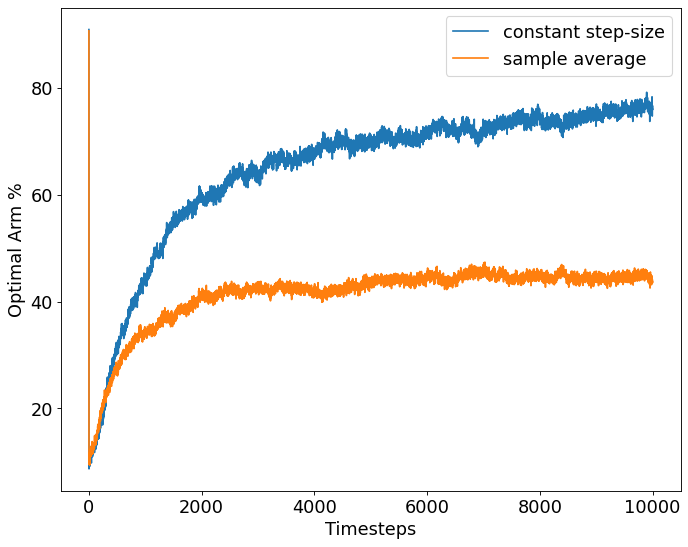

In [ ]:
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 16})
plt.plot(OptArm_alpha)
plt.xlabel("Timesteps")
plt.ylabel("Optimal Arm %")
plt.plot(OptArm_avg)
plt.legend(["constant step-size","sample average"])
plt.show()